<a href="https://colab.research.google.com/github/moonsejin315/Python/blob/main/gen_ai_01_exploring_restaurant_review_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 실데이터로 공부해보기

In [1]:
# 한글 폰트를 설치합니다.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,439 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and dire

In [2]:
# URL에 있는 파일을 다운로드 받습니다.

import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/dataset/tarr_train.txt",
    filename="tarr_train.txt",
)

('tarr_train.txt', <http.client.HTTPMessage at 0x7a46b63ba590>)

In [3]:
#정형 데이터 분석 >> 판다스
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load file
train_file_path = '/content/tarr_train.txt'

In [6]:
train_data = pd.read_csv(train_file_path, sep = '\t')
train_data.head()

,id,comment,label
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1
3,4,왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음,0
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1


In [7]:
train_data.shape

(300, 3)

In [8]:
len(train_data)

300

In [10]:
train_data['comment_length'] = train_data['comment'].apply(len)

In [11]:
train_data.head()

,id,comment,label,comment_length
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1,27
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1,43
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1,24
3,4,왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음,0,25
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1,39


In [12]:
train_data['comment_length'].describe()

count    300.000000
mean      31.236667
std       10.682120
min        5.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       92.000000
Name: comment_length, dtype: float64

In [13]:
comment_length_statistics = train_data['comment_length'].describe()
comment_length_statistics

count    300.000000
mean      31.236667
std       10.682120
min        5.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       92.000000
Name: comment_length, dtype: float64

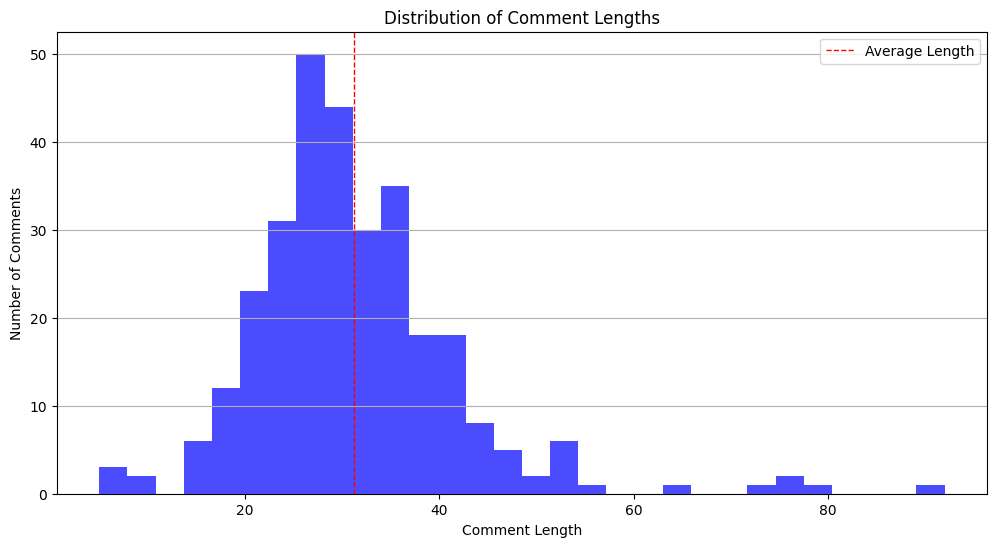

In [15]:
# Plotting the distribution of comment lengths
plt.figure(figsize=(12, 6))
plt.hist(train_data['comment_length'], bins=30, color='blue', alpha=0.7)
#axvline : 기준선
plt.axvline(train_data['comment_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Length')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')
plt.show()

In [16]:
train_data['label'].value_counts()

label
1    162
0    138
Name: count, dtype: int64

In [17]:
label_count = train_data['label'].value_counts()
label_count

label
1    162
0    138
Name: count, dtype: int64

In [19]:
label_distribution = train_data['label'].value_counts(normalize = True)
label_distribution

label
1    0.54
0    0.46
Name: proportion, dtype: float64

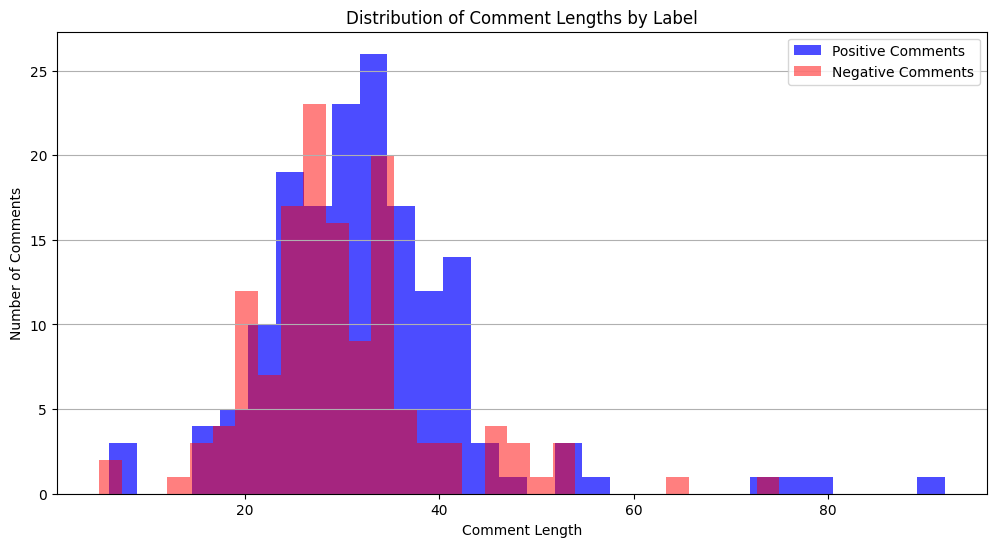

In [20]:
# Plotting distribution of comment lengths by label
plt.figure(figsize=(12, 6))
plt.hist(train_data[train_data['label'] == 1]['comment_length'], bins=30, color='blue', alpha=0.7, label='Positive Comments')
plt.hist(train_data[train_data['label'] == 0]['comment_length'], bins=30, color='red', alpha=0.5, label='Negative Comments')
plt.title('Distribution of Comment Lengths by Label')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')
plt.show()

In [29]:
from collections import Counter
import re

def get_word_frequencies(texts):
  words = []
  for text in texts:
    #구두점 제거한 후 공백 기준으로 토큰화
    words.extend(re.findall(r'\b\w+\b', text))

  #단어 빈도수 계산
  return Counter(words)

In [30]:
train_data[train_data['label'] == 1]['comment']

0                      여기 음식은 언제 와도 실망시키지 않아요. 최고!
1      여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.
2                         진짜 깔끔하고, 맛도 좋았어요. 추천합니다!
4          인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!
5                   메뉴 설명을 너무 친절하게 해주셔서 고르기 수월했어요.
                          ...                     
290                     음식 사진 찍기 좋아요. 인스타에 올릴 만해요!
294                 다 좋은데, 음악 볼륨만 좀 낮추면 완벽할 것 같아요!
295                  와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!
296       처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!
298                직원들이 너무 친절해서 기분 좋게 먹고 왔습니다. 굿굿!
Name: comment, Length: 162, dtype: object

In [31]:
positive_comment = train_data[train_data['label'] == 1]['comment']
negative_comment = train_data[train_data['label'] == 0]['comment']
negative_comment[:3]

3        왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음
6           사진과 음식이 너무 달라서 실망했습니다.
8    솔직히...? 맛이 그닥이에요. 리뷰랑 너무 다르네.
Name: comment, dtype: object

In [32]:
get_word_frequencies(positive_comment)

Counter({'여기': 31,
         '음식은': 6,
         '언제': 3,
         '와도': 3,
         '실망시키지': 1,
         '않아요': 1,
         '최고': 6,
         '라멘': 1,
         '진짜': 23,
         'ㄹㅇ': 5,
         '맛있어요': 9,
         '국물이': 2,
         '진하고': 1,
         '면도': 1,
         '쫄깃해서': 1,
         '너무': 23,
         '좋았습니다': 5,
         '깔끔하고': 1,
         '맛도': 4,
         '좋았어요': 8,
         '추천합니다': 5,
         '인생': 2,
         '타르트를': 1,
         '여기서': 1,
         '만났어요': 1,
         '달지': 1,
         '않고': 2,
         '고소해서': 1,
         '정말': 14,
         '메뉴': 7,
         '설명을': 1,
         '친절하게': 1,
         '해주셔서': 2,
         '고르기': 1,
         '수월했어요': 2,
         '주변에': 1,
         '추천하려고': 1,
         '사진도': 1,
         '많이': 1,
         '찍었어요': 1,
         '좋아요': 16,
         '개꿀맛': 1,
         'ㅠ': 1,
         '다른곳': 1,
         '안가': 1,
         '음식도': 7,
         '맛있고': 2,
         '가격도': 3,
         '합리적이에요': 1,
         '다음에': 3,
         '또': 8,
         '오려구요': 1,
    

In [33]:
positive_words_freq = get_word_frequencies(positive_comment)
negative_words_freq = get_word_frequencies(negative_comment)

In [37]:
print(negative_words_freq)

Counter({'너무': 42, '좀': 23, '안': 20, '같아요': 14, '음식이': 13, '것': 13, '올': 11, '여기': 10, '그냥': 10, '왔는데': 9, '이런': 9, '왜': 8, '맛이': 8, '이렇게': 7, '별로였어요': 7, '전': 7, '다른': 6, '다신': 6, '다': 6, '다시': 6, '솔직히': 5, '늦게': 5, '음식도': 5, '음식': 5, '가격': 5, 'ㅠㅠ': 5, '음': 5, '리뷰': 5, '리뷰보고': 4, '주문한': 4, '기대': 4, '조금': 4, '더': 4, '짜서': 4, '계속': 4, '그랬어요': 4, '다시는': 4, '걸': 4, '불편했어요': 4, '좋은데': 4, '내': 4, '듯': 4, '힘들었어요': 4, '기다리는': 3, '이하였습니다': 3, '나오고': 3, '거': 3, '서비스가': 3, '떨어진': 3, '대비': 3, '태도가': 3, '불친절해서': 3, '기분이': 3, '뭐': 3, '서비스': 3, '차': 3, '와': 3, '이': 3, '직원들': 3, '별로': 3, '1시간': 3, '음식은': 3, '별로였습니다': 3, '분들은': 3, '제': 3, '주고': 3, '시끄러워서': 3, '여긴': 3, '가격이': 3, '좋아서': 3, '진짜': 3, '청결': 3, '해주세요': 3, '이래': 3, '달라서': 2, '나와서': 2, '나오지': 2, '않아서': 2, '뭐가': 2, '그닥': 2, '실망이에요': 2, '소리가': 2, '이전에': 2, '때보다': 2, '많이': 2, '했는데': 2, '좋겠어요': 2, '음식의': 2, '양이': 2, '맛은': 2, '분위기는': 2, '좋았습니다': 2, '주문한지': 2, '주차공간이': 2, '협소해서': 2, '불편했습니다': 2, '최악의': 2, '가게': 2, '될': 2, '직원분이': 2, '주차장이': 2, 'ㄴㅇㄱ

In [36]:
print(positive_words_freq.most_common(10))

[('여기', 31), ('진짜', 23), ('너무', 23), ('좋아요', 16), ('정말', 14), ('이런', 14), ('같아요', 11), ('맛있어요', 9), ('좋았어요', 8), ('또', 8)]


In [40]:
print(negative_words_freq.most_common(10))

[('너무', 42), ('좀', 23), ('안', 20), ('같아요', 14), ('음식이', 13), ('것', 13), ('올', 11), ('여기', 10), ('그냥', 10), ('왔는데', 9)]


In [41]:
top_positive_words = positive_words_freq.most_common(10)
top_negative_words = negative_words_freq.most_common(10)

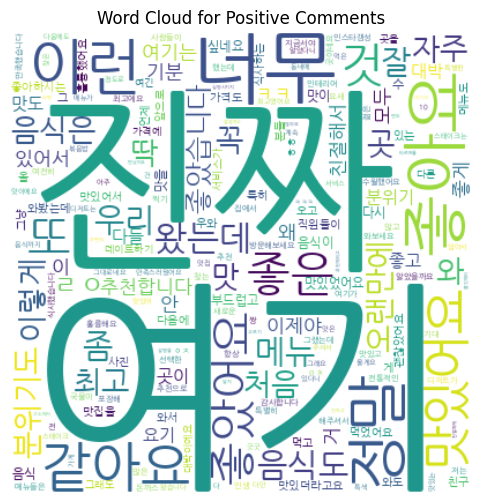

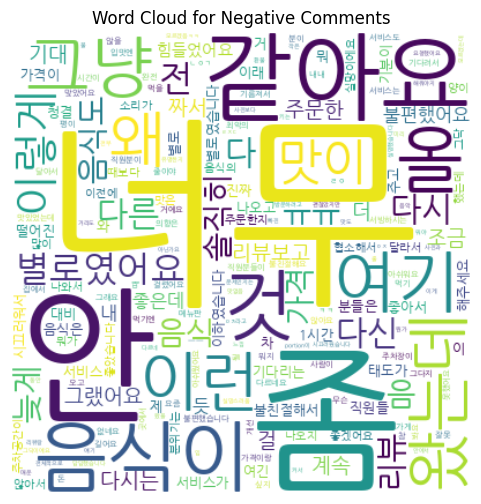

In [44]:
from wordcloud import WordCloud

# positive and negative comments -> 워드클라우드 생성
def generate_wordcloud(word_freq, title):
    wc = WordCloud(width=400, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(word_freq)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 워드클라우드 시각화
generate_wordcloud(positive_words_freq, 'Word Cloud for Positive Comments')
generate_wordcloud(negative_words_freq, 'Word Cloud for Negative Comments')

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

#텍스트 모음(corpus)에서 상위 n개의 n-gram 반환하는 함수
def get_top_ngrams(corpus, ngram_range, top_n):
  #초기화
  vec = CountVectorizer(ngram_range = ngram_range).fit(corpus)
  bag_of_words = vec.transform(corpus)
  #결과물 : ngram의 빈도를 나타내는 행렬
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True) #내림차순 정렬
  #x = (word, freq) >> tuple 2번째인 빈도수 기준
  return words_freq[:top_n]

In [46]:
# top_bigram, top_trigram
top_bigram = get_top_ngrams(train_data['comment'], ngram_range=(2,2), top_n=10)
top_trigram = get_top_ngrams(train_data['comment'], ngram_range=(3,3), top_n=10)

In [47]:
top_bigram

[('음식이 너무', 8),
 ('너무 친절해서', 5),
 ('친절해서 기분', 5),
 ('기분 좋게', 5),
 ('너무 짜서', 4),
 ('그냥 그랬어요', 4),
 ('분위기도 좋고', 4),
 ('서비스가 너무', 4),
 ('진짜 ㄹㅇ', 3),
 ('리뷰보고 왔는데', 3)]

In [48]:
top_trigram

[('너무 친절해서 기분', 5),
 ('친절해서 기분 좋게', 5),
 ('음식도 늦게 나오고', 3),
 ('분위기도 좋고 음식도', 3),
 ('직원들이 너무 친절해서', 3),
 ('진짜 ㄹㅇ 맛있어요', 2),
 ('음식이 너무 늦게', 2),
 ('이런 맛집을 지금서야', 2),
 ('왔을 때보다 서비스가', 2),
 ('많이 떨어진 같아요', 2)]

In [50]:
get_top_ngrams(train_data[train_data['label']==1]['comment'],ngram_range=(2,2),top_n=10)

[('너무 친절해서', 5),
 ('친절해서 기분', 5),
 ('기분 좋게', 5),
 ('분위기도 좋고', 4),
 ('진짜 ㄹㅇ', 3),
 ('이런 맛집을', 3),
 ('좋아하시는 분들', 3),
 ('처음 와봤는데', 3),
 ('좋고 음식도', 3),
 ('직원들이 너무', 3)]

In [51]:
top_bigrams_positive = get_top_ngrams(train_data[train_data['label']==1]['comment'],ngram_range=(2,2),top_n=10)
top_trigrams_positive = get_top_ngrams(train_data[train_data['label']==1]['comment'],ngram_range=(3,3),top_n=10)

top_bigrams_neagtive = get_top_ngrams(train_data[train_data['label']==0]['comment'],ngram_range=(2,2),top_n=10)
top_trigrams_negative = get_top_ngrams(train_data[train_data['label']==0]['comment'],ngram_range=(3,3),top_n=10)

In [52]:
top_bigrams_positive, top_trigrams_positive

([('너무 친절해서', 5),
  ('친절해서 기분', 5),
  ('기분 좋게', 5),
  ('분위기도 좋고', 4),
  ('진짜 ㄹㅇ', 3),
  ('이런 맛집을', 3),
  ('좋아하시는 분들', 3),
  ('처음 와봤는데', 3),
  ('좋고 음식도', 3),
  ('직원들이 너무', 3)],
 [('너무 친절해서 기분', 5),
  ('친절해서 기분 좋게', 5),
  ('분위기도 좋고 음식도', 3),
  ('직원들이 너무 친절해서', 3),
  ('진짜 ㄹㅇ 맛있어요', 2),
  ('이런 맛집을 지금서야', 2),
  ('좋아하시는 분들 와보세요', 2),
  ('여기 인테리어 너무', 2),
  ('친구 추천으로 왔는데', 2),
  ('사진 찍기 좋아요', 2)])

In [53]:
top_bigrams_neagtive, top_trigrams_negative

([('음식이 너무', 7),
  ('너무 짜서', 4),
  ('그냥 그랬어요', 4),
  ('리뷰보고 왔는데', 3),
  ('기대 이하였습니다', 3),
  ('음식도 늦게', 3),
  ('늦게 나오고', 3),
  ('떨어진 같아요', 3),
  ('가격 대비', 3),
  ('너무 시끄러워서', 3)],
 [('음식도 늦게 나오고', 3),
  ('음식이 너무 늦게', 2),
  ('많이 떨어진 같아요', 2),
  ('음식이 너무 짜서', 2),
  ('너무 짜서 먹기', 2),
  ('짜서 먹기 힘들었어요', 2),
  ('오고 싶지 않아요', 2),
  ('리뷰 좋아서 왔는데', 2),
  ('여긴 이렇게 사람이', 2),
  ('여기 리뷰 이래', 2)])

In [54]:
keywords = ['서비스', '가격', '맛', '분위기', '직원']

keyword_count = {keyword: train_data['comment'].str.count(keyword).sum() for keyword in keywords}
keyword_count

{'서비스': 19, '가격': 19, '맛': 85, '분위기': 15, '직원': 20}

In [56]:
positive_keyword_counts = {keyword: train_data[train_data['label']==1]['comment'].str.count(keyword).sum() for keyword in keywords}
neagtive_keyword_counts = {keyword: train_data[train_data['label']==0]['comment'].str.count(keyword).sum() for keyword in keywords}

In [57]:
positive_keyword_counts, neagtive_keyword_counts

({'서비스': 8, '가격': 8, '맛': 63, '분위기': 13, '직원': 11},
 {'서비스': 11, '가격': 11, '맛': 22, '분위기': 2, '직원': 9})

In [59]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.6 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

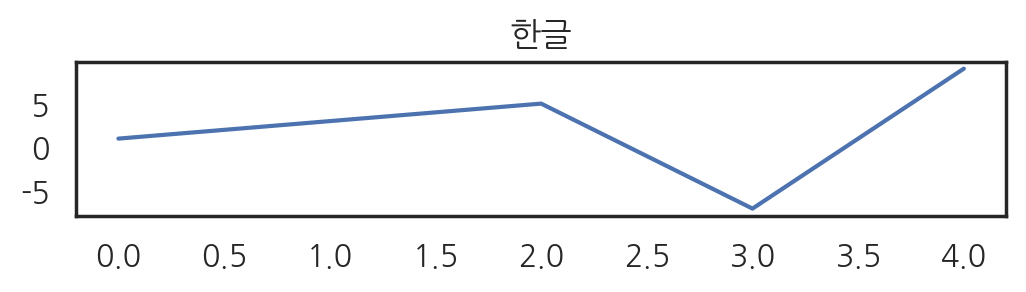

In [63]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title="한글", figsize=(6, 1))

<ipython-input-64-1496a5cd8d92>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()), ax=ax[0], palette='Blues_d')
<ipython-input-64-1496a5cd8d92>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(neagtive_keyword_counts.keys()), y=list(neagtive_keyword_counts.values()), ax=ax[1], palette='Reds_d')


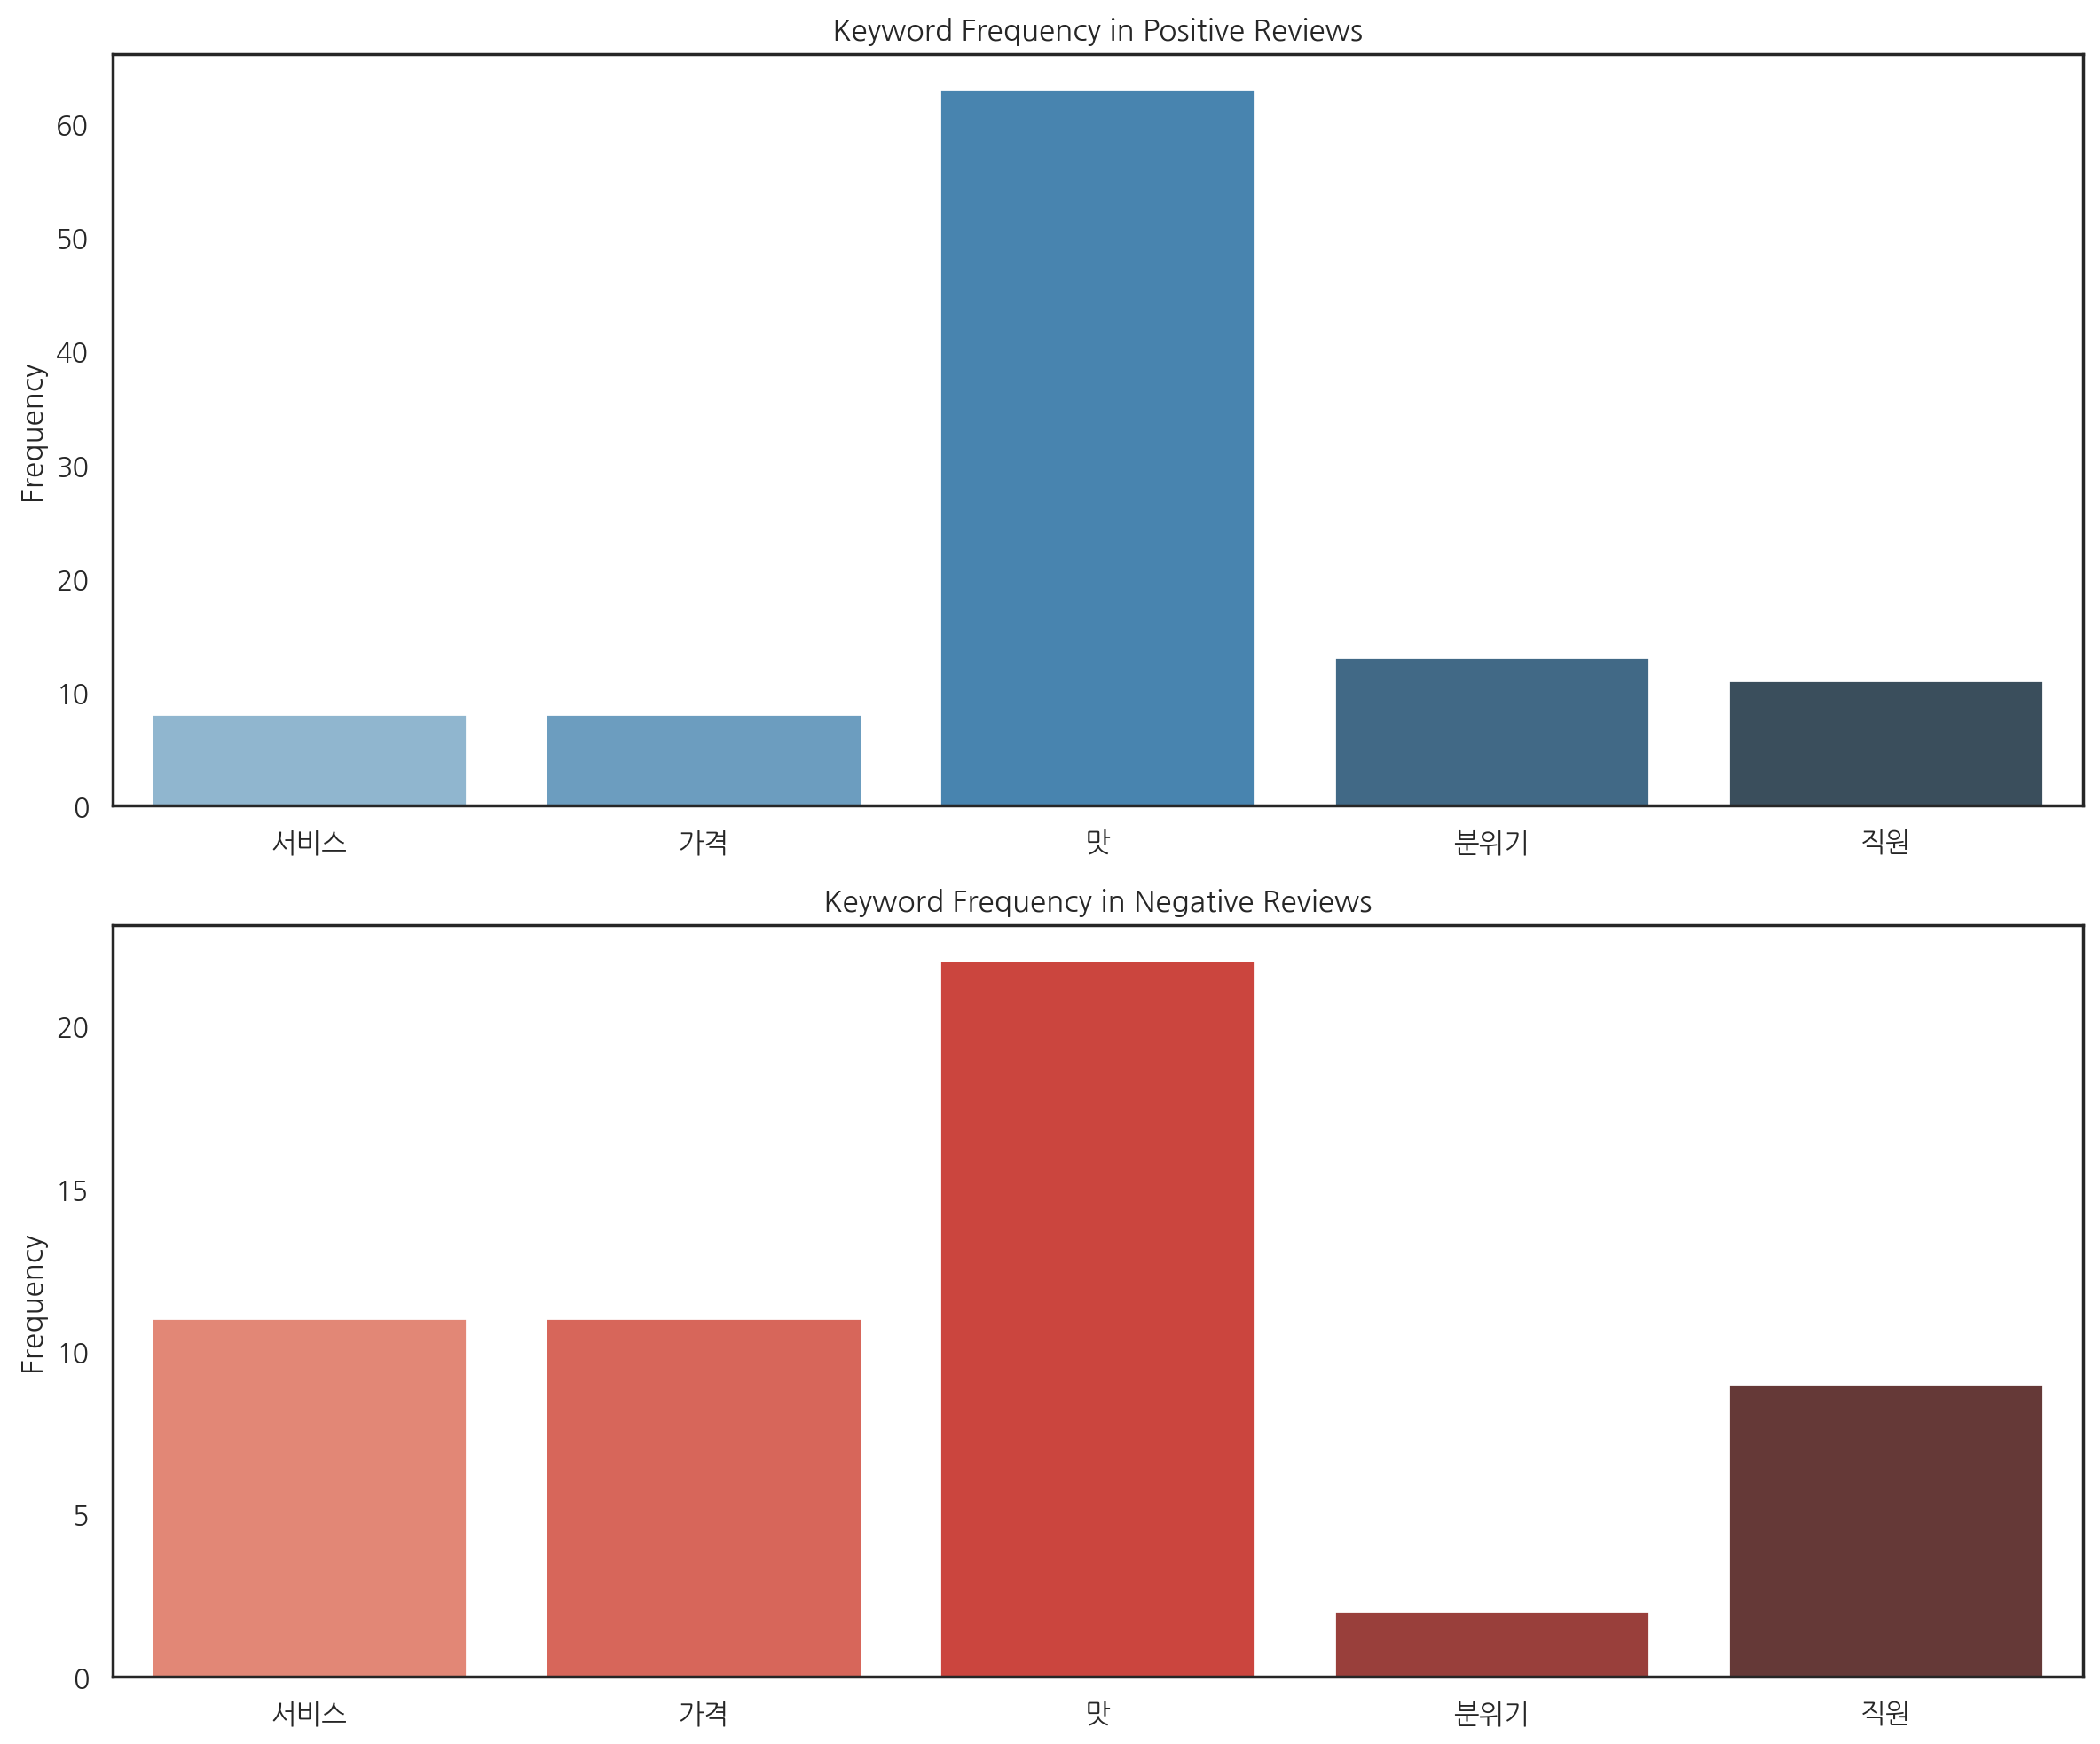

In [64]:
import seaborn as sns

# 긍정 부정 키워드 시각화

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')

# Positive reviews
sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()), ax=ax[0], palette='Blues_d')
ax[0].set_title("Keyword Frequency in Positive Reviews")
ax[0].set_ylabel("Frequency")

# Negative reviews
sns.barplot(x=list(neagtive_keyword_counts.keys()), y=list(neagtive_keyword_counts.values()), ax=ax[1], palette='Reds_d')
ax[1].set_title("Keyword Frequency in Negative Reviews")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [66]:
#텍스트 코퍼스에서 tf-idf 점수가 가장 높은 top_n 개의 단어를 반환하는 함수 생성
def get_top_tfidf_words(corpus, top_n):
  #tf-idf 행렬 정렬
  tfidf_vec = TfidfVectorizer()
  transformed = tfidf_vec.fit_transform(corpus)
  mean_idf = transformed.mean(axis = 0).tolist()[0]
  #transformed 행렬의 각 열의 평균 tfidf 값 계산 -> 리스트로 변환
  sorted_tfidf_index = np.argsort(mean_idf)[-top_n:]

  sorted_tfidf_values = [mean_idf[i] for i in sorted_tfidf_index]
  #상위 top_n의 단어에 해당하는 평균 tfidf 값을 리스트로 담기

  sorted_tfidf_features = [tfidf_vec.get_feature_names_out()[i] for i in sorted_tfidf_index]
  #상위 top_n개의 단어 자체를 담은 리스트
  return list(zip(sorted_tfidf_features, sorted_tfidf_values))
  #상위 top_n개의 단어와, 그에 대응하는 tfidf 값 >> 튜플 형태 결합 >> 리스트로 변환

In [67]:
get_top_tfidf_words(train_data['comment'], 10)

[('그냥', 0.013687376648590821),
 ('정말', 0.014749058066344661),
 ('좋아요', 0.014972658609432315),
 ('음식이', 0.01691058446184101),
 ('왔는데', 0.017129225820536793),
 ('이런', 0.019819055177452128),
 ('같아요', 0.020639435969586076),
 ('진짜', 0.024167310616650294),
 ('여기', 0.031209780984430703),
 ('너무', 0.04233601334982538)]

In [68]:
top_tfidf_featuers = get_top_tfidf_words(train_data['comment'], 10)
top_tfidf_featuers

[('그냥', 0.013687376648590821),
 ('정말', 0.014749058066344661),
 ('좋아요', 0.014972658609432315),
 ('음식이', 0.01691058446184101),
 ('왔는데', 0.017129225820536793),
 ('이런', 0.019819055177452128),
 ('같아요', 0.020639435969586076),
 ('진짜', 0.024167310616650294),
 ('여기', 0.031209780984430703),
 ('너무', 0.04233601334982538)]

In [71]:
top_tfidf_positive = get_top_tfidf_words(train_data[train_data['label']==1]['comment'], 10)
top_tfidf_negative = get_top_tfidf_words(train_data[train_data['label']==0]['comment'], 10)

In [72]:
top_tfidf_positive, top_tfidf_negative

([('좋은', 0.015794573515558488),
  ('왔는데', 0.016700611449025134),
  ('같아요', 0.01877905877210045),
  ('맛있어요', 0.020917787452746334),
  ('이런', 0.022451006535394235),
  ('정말', 0.025829318842390096),
  ('좋아요', 0.025855855648262004),
  ('너무', 0.034610136670802),
  ('진짜', 0.037387900220376004),
  ('여기', 0.04163214429506404)],
 [('이렇게', 0.015448051934657724),
  ('별로였어요', 0.017845587667163616),
  ('맛이', 0.02009740100089326),
  ('이런', 0.020486778220176298),
  ('왔는데', 0.020911414159821392),
  ('그냥', 0.02315386264694077),
  ('여기', 0.023508509590134744),
  ('같아요', 0.026674037078069108),
  ('음식이', 0.028554791673134412),
  ('너무', 0.05873634746611193)])

In [73]:
corpus = [
    "I love machine learning and artificial intelligence",
    "Machine learning is fascinating",
    "I love learning new things about Gen-AI and ML"
]

In [75]:
get_top_tfidf_words(corpus, 5)

[('is', 0.194827633673355),
 ('and', 0.21797712997197954),
 ('love', 0.21797712997197954),
 ('machine', 0.2736150192293466),
 ('learning', 0.2843470255464275)]